In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        break

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [7]:
df_train = pd.read_csv('data/train.txt',sep=' ',header=None)

C:\Users\pedro\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,
C:\Users\pedro\AppData\Local\Temp\ipykernel_9908\1697359644.py:14: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im       = imageio.imread(data_dir + item[0])/255.


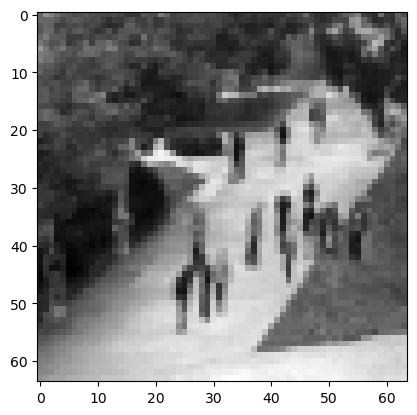

label: 20.0


In [8]:
import imageio
from skimage import transform,io
import matplotlib.pyplot as plt
# read images and store into a np array

data_dir = 'data/train/train/'
im_size = 64
N = df_train.shape[0]
X = np.zeros((N, im_size,im_size))
y = np.zeros((N))
cont =0

for ind, item in df_train.iterrows():
    im       = imageio.imread(data_dir + item[0])/255.
    small_im = transform.resize(im, (im_size,im_size), mode='symmetric', preserve_range=True)
    X[cont, :,:] = small_im
    y[cont] = item[1]
    cont+=1
    
plt.imshow(X[0, :,:],cmap='gray')
plt.show()
print("label:", y[0])

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val= train_test_split(X, y, test_size=0.33, random_state=66)

In [10]:
## With a Neural Network

import tensorflow as tf
from tensorflow import keras

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [11]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[64, 64]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(1, activation="linear"))

In [12]:
model.layers

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dense (Dense)               (None, 300)               1229100   
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 1259301 (4.80 MB)
Trainable params: 1259301 (4.80 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
model.compile(loss="mean_squared_error",
              optimizer="rmsprop")

In [15]:
history = model.fit(X_train, y_train, epochs=50,
                    validation_data=(X_val, y_val),verbose=1)

Epoch 1/50

315/315 [==============================] - 2s 4ms/step - loss: 82.2779 - val_loss: 42.6608
Epoch 2/50
315/315 [==============================] - 1s 4ms/step - loss: 48.6959 - val_loss: 33.3360
Epoch 3/50
315/315 [==============================] - 1s 4ms/step - loss: 38.4681 - val_loss: 67.1800
Epoch 4/50
315/315 [==============================] - 1s 4ms/step - loss: 32.7644 - val_loss: 17.5795
Epoch 5/50
315/315 [==============================] - 1s 4ms/step - loss: 28.5028 - val_loss: 26.5403
Epoch 6/50
315/315 [==============================] - 1s 4ms/step - loss: 25.4455 - val_loss: 20.0001
Epoch 7/50
315/315 [==============================] - 1s 4ms/step - loss: 23.1726 - val_loss: 45.4900
Epoch 8/50
315/315 [==============================] - 1s 4ms/step - loss: 22.1040 - val_loss: 12.3850
Epoch 9/50
315/315 [==============================] - 1s 4ms/step - loss: 19.9427 - val_loss: 58.0326
Epoch 10/50
315/315 [==============================] - 1s 3ms/step - loss: 19.237

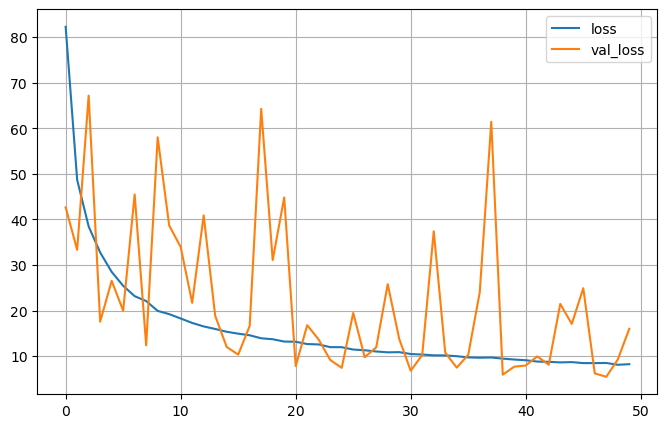

In [16]:
import pandas as pd

pd.DataFrame(history.history)[['loss','val_loss']].plot(figsize=(8, 5))
plt.grid(True)
#plt.gca().set_ylim(0.4, 0.8)
plt.show()

155/155 [==============================] - 0s 874us/step


4.00130447937947

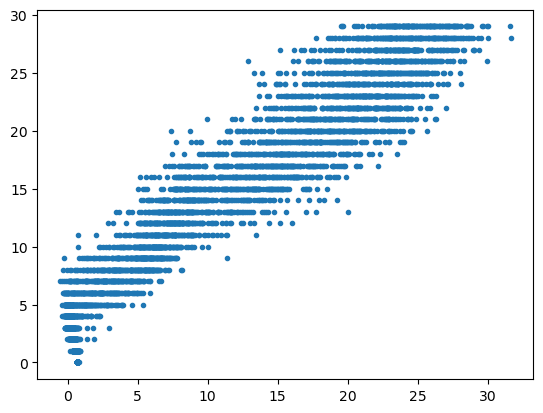

In [17]:
from sklearn.metrics import mean_squared_error
y_model1 = model.predict(X_val)

plt.plot(y_model1,y_val,'.')
np.sqrt(mean_squared_error(y_model1,y_val))

C:\Users\pedro\AppData\Local\Temp\ipykernel_9908\3443467294.py:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im       = imageio.imread(test_dir + 'test_composite'+str(x).zfill(9) + '.png')/255.


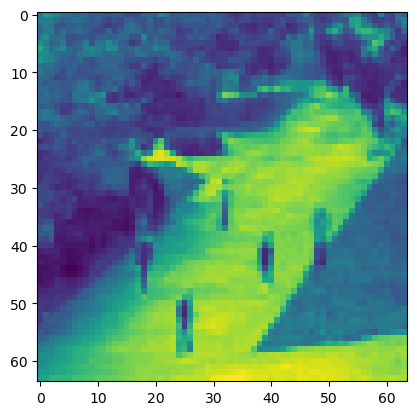

In [19]:
## evaluate test and generate submission
test_dir = 'data/test/test/test/'
im_size = 64
N = 500
X_test = np.zeros((N, im_size,im_size))
cont =0

for x in range(500):
    im       = imageio.imread(test_dir + 'test_composite'+str(x).zfill(9) + '.png')/255.
    small_im = transform.resize(im, (im_size,im_size), mode='symmetric', preserve_range=True)
    X_test[cont, :,:] = small_im
    cont+=1
    
plt.imshow(small_im)
plt.show()

In [20]:
# create the file to make the sumbission

y_test = model.predict(X_test)
y_test = [int(x[0]) for x in y_test]

df_output = pd.DataFrame(y_test)
df_output.index.name = 'index'
df_output.columns = ['prediction']
df_output.to_csv('output.csv')

16/16 [==============================] - 0s 1ms/step


# Nuestro modelo

Este modelo es una red neuronal convolucional (CNN) diseñada para un problema de regresión. Aquí está una descripción en formato de texto:

### División de Datos:

Se divide el conjunto de datos en conjuntos de entrenamiento (X_train, y_train) y validación (X_val, y_val) usando un 33% para validación.

### Modelo CNN:

Modelo secuencial con capas convolucionales, de MaxPooling y de Dropout para la regularización.

La arquitectura incluye capas convolucionales con 32, 64 y 128 filtros, seguidas de MaxPooling para reducir las dimensiones espaciales.

Se utiliza Dropout para prevenir el sobreajuste.

Dos capas densas (totalmente conectadas) con funciones de activación ReLU y una capa de salida lineal para la regresión.

### Compilación del Modelo:

Se compila el modelo usando el optimizador Adam y la función de pérdida de error cuadrático medio.

### Entrenamiento del Modelo:

El modelo se entrena durante 100 épocas, con una parada temprana (EarlyStopping) si la pérdida de validación no mejora en 10 épocas consecutivas.

### Visualización del Historial de Entrenamiento:

Se muestra un gráfico de la pérdida de entrenamiento y validación a lo largo de las épocas.

### Evaluación del Modelo:

Se evalúa el modelo en los datos de validación, generando predicciones y calculando el error cuadrático medio.

### Generación de Predicciones para Datos de Prueba:

Las imágenes de prueba se cargan y se realiza la predicción usando el modelo entrenado.
Las predicciones se guardan en un archivo CSV para su presentación.

In [64]:
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
from sklearn.metrics import mean_squared_error


In [65]:
# División de datos en conjuntos de entrenamiento y validación
X_train, X_val, y_train, y_val= train_test_split(X, y, test_size=0.33, random_state=66)

In [66]:
# Definición del modelo CNN
model_cnn = models.Sequential()
model_cnn.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)))
model_cnn.add(layers.MaxPooling2D((2, 2)))
model_cnn.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_cnn.add(layers.MaxPooling2D((2, 2)))
model_cnn.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_cnn.add(layers.MaxPooling2D((2, 2)))
model_cnn.add(layers.Dropout(0.5)) 
model_cnn.add(layers.Flatten())
model_cnn.add(layers.Dense(64, activation='relu'))
model_cnn.add(layers.Dropout(0.5)) 
model_cnn.add(layers.Dense(1, activation='linear'))

# Compilación del modelo
model_cnn.compile(optimizer='adam', loss='mean_squared_error')
model_cnn.summary()


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d_27 (MaxPooli  (None, 31, 31, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_28 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_28 (MaxPooli  (None, 14, 14, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_29 (Conv2D)          (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_29 (MaxPooli  (None, 6, 6, 128)       

In [67]:
# Configuración de EarlyStopping para evitar sobreajuste
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Entrenamiento del modelo
history_cnn = model_cnn.fit(X_train, y_train, epochs=100,  # Más epochs
                            validation_data=(X_val, y_val),
                            callbacks=[early_stopping], verbose=1)


Epoch 1/100
315/315 [==============================] - 8s 24ms/step - loss: 46.7569 - val_loss: 17.4753
Epoch 2/100
315/315 [==============================] - 8s 25ms/step - loss: 18.8770 - val_loss: 7.8569
Epoch 3/100
315/315 [==============================] - 7s 23ms/step - loss: 17.6204 - val_loss: 6.0385
Epoch 4/100
315/315 [==============================] - 8s 24ms/step - loss: 16.6309 - val_loss: 5.5565
Epoch 5/100
315/315 [==============================] - 8s 24ms/step - loss: 15.3923 - val_loss: 4.5700
Epoch 6/100
315/315 [==============================] - 8s 25ms/step - loss: 15.3084 - val_loss: 9.7300
Epoch 7/100
315/315 [==============================] - 7s 23ms/step - loss: 14.7520 - val_loss: 7.3136
Epoch 8/100
315/315 [==============================] - 7s 24ms/step - loss: 14.8357 - val_loss: 7.2111
Epoch 9/100
315/315 [==============================] - 8s 24ms/step - loss: 14.4743 - val_loss: 3.7750
Epoch 10/100
315/315 [==============================] - 7s 24ms/step - l

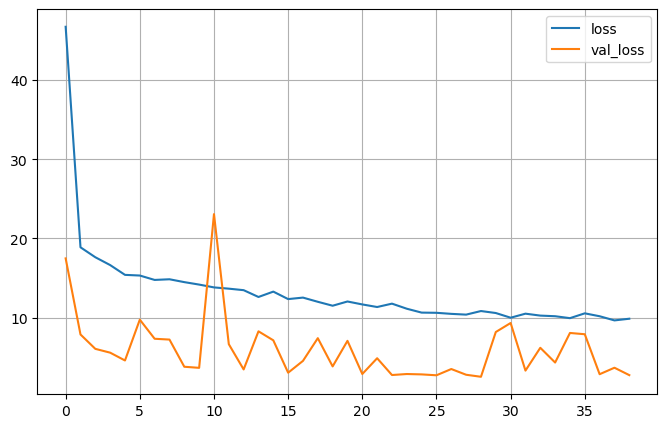

In [68]:
# Visualización del historial de entrenamiento
pd.DataFrame(history_cnn.history)[['loss', 'val_loss']].plot(figsize=(8, 5))
plt.grid(True)
plt.show()

155/155 [==============================] - 1s 5ms/step


1.5837252771141475

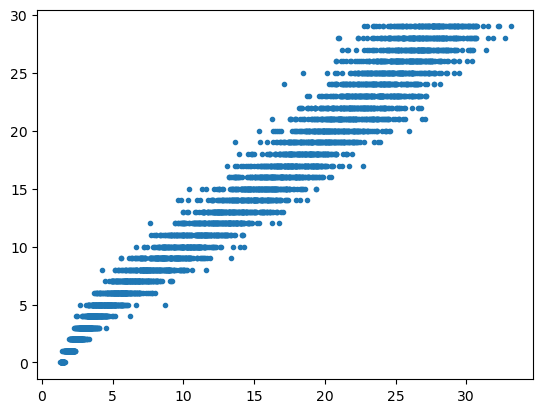

In [69]:
# Evaluación del modelo en el conjunto de validación
y_model1 = model_cnn.predict(X_val)
plt.plot(y_model1,y_val,'.')
np.sqrt(mean_squared_error(y_model1, y_val))


C:\Users\pedro\AppData\Local\Temp\ipykernel_9908\2311057879.py:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im       = imageio.imread(test_dir + 'test_composite'+str(x).zfill(9) + '.png')/255.


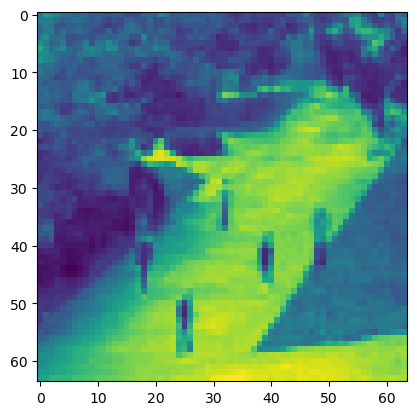

In [70]:
# Carga de imágenes de prueba y generación de predicciones
test_dir = 'data/test/test/test/'
im_size = 64
N = 500
X_test = np.zeros((N, im_size,im_size))
cont =0

for x in range(500):
    im       = imageio.imread(test_dir + 'test_composite'+str(x).zfill(9) + '.png')/255.
    small_im = transform.resize(im, (im_size,im_size), mode='symmetric', preserve_range=True)
    X_test[cont, :,:] = small_im
    cont+=1
    
plt.imshow(small_im)
plt.show()

In [71]:
# Generación de predicciones para datos de prueba
y_test = model_cnn.predict(X_test)
y_test = [int(x[0]) for x in y_test]

# Creación del archivo de salida CSV
df_output = pd.DataFrame(y_test)
df_output.index.name = 'index'
df_output.columns = ['prediction']
df_output.to_csv('output.csv')

16/16 [==============================] - 0s 6ms/step


Se intentaron diversas modificaciones en la primera implementación del modelo para mejorar su rendimiento, pero ninguna de ellas condujo a mejoras sustanciales. Se ajustaron el número de filtros en la primera capa convolucional, la tasa de dropout en capas específicas, el optimizador utilizado, y se implementó el aumento de datos. Sin embargo, a pesar de estos cambios, el modelo no mostró una mejora significativa en la capacidad de generalización o la reducción del error. Como resultado, se optó por mantener la primera implementación del modelo, ya que las adaptaciones propuestas no proporcionaron beneficios notables en términos de rendimiento.

# Otro modelo

El segundo modelo implementa un enfoque de búsqueda de hiperparámetros utilizando la biblioteca Keras Tuner. Primero, se dividen los datos en conjuntos de entrenamiento y validación. Luego, se define una función para construir el modelo, con parámetros configurables como el número de filtros en la capa convolucional, el número de unidades en la capa densa y la tasa de aprendizaje. Esta función también compila el modelo utilizando el optimizador Adam y la pérdida de error cuadrático medio.

A continuación, se configura y ejecuta Keras Tuner para realizar una búsqueda aleatoria de hiperparámetros. El objetivo es minimizar la pérdida en el conjunto de validación. Se establece un límite de 10 intentos de configuración y se realiza cada configuración tres veces para reducir la influencia del azar en la búsqueda.

Una vez completada la búsqueda, se obtiene el mejor modelo según los hiperparámetros encontrados. Se muestra un resumen de la arquitectura del modelo. Luego, se entrena este mejor modelo utilizando los datos de entrenamiento con un mayor número de épocas (100).

Después del entrenamiento, se evalúa el rendimiento del modelo en el conjunto de validación, graficando las predicciones frente a los valores reales y calculando la raíz cuadrada del error cuadrático medio.

Finalmente, se utilizan las predicciones del modelo entrenado para el conjunto de prueba. Estas predicciones se guardan en un archivo CSV, que se puede utilizar para generar la salida necesaria para la evaluación del modelo.

In [28]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=66)

In [29]:
# Definición de la función para construir el modelo con hiperparámetros variables
def build_model(hp):
    model = keras.models.Sequential()
    model.add(layers.Conv2D(hp.Int('conv_1_filters', min_value=32, max_value=128, step=32),
                            (3, 3), activation='relu', input_shape=(64, 64, 1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(hp.Int('dense_units', min_value=32, max_value=128, step=32), activation='relu'))
    model.add(layers.Dropout(0.5)) 
    model.add(layers.Dense(1, activation='linear'))

    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss='mean_squared_error')

    return model

In [30]:
# Configuración y ejecución del Keras Tuner
from kerastuner.tuners import RandomSearch
tuner = RandomSearch(build_model,
                     objective='val_loss',
                     max_trials=10,
                     executions_per_trial=3,
                     directory='my_dir',
                     project_name='hparam_tuning')

tuner.search(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

ModuleNotFoundError: No module named 'kerastuner'

In [ ]:
# Obtención del mejor modelo
best_model = tuner.get_best_models(num_models=1)[0]
best_model.summary()

In [ ]:
history_cnn = best_model.fit(X_train, y_train, epochs=100,
                             validation_data=(X_val, y_val),
                             verbose=1)


In [ ]:
import pandas as pd

pd.DataFrame(history_cnn.history)[['loss','val_loss']].plot(figsize=(8, 5))
plt.grid(True)
#plt.gca().set_ylim(0.4, 0.8)
plt.show()

In [ ]:
# Evaluación del modelo
y_model1 = best_model.predict(X_val)
plt.plot(y_model1,y_val,'.')
np.sqrt(mean_squared_error(y_model1, y_val))

In [ ]:
## evaluate test and generate submission
test_dir = 'data/test/test/test/'
im_size = 64
N = 500
X_test = np.zeros((N, im_size,im_size))
cont =0

for x in range(500):
    im       = imageio.imread(test_dir + 'test_composite'+str(x).zfill(9) + '.png')/255.
    small_im = transform.resize(im, (im_size,im_size), mode='symmetric', preserve_range=True)
    X_test[cont, :,:] = small_im
    cont+=1
    
plt.imshow(small_im)
plt.show()

In [ ]:
# create the file to make the sumbission

y_test =best_model.predict(X_test)
y_test = [int(x[0]) for x in y_test]

df_output = pd.DataFrame(y_test)
df_output.index.name = 'index'
df_output.columns = ['prediction']
df_output.to_csv('output.csv')